<a href="https://colab.research.google.com/github/ayushi7503/DATA-SCIENCE/blob/main/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=5aaf2ee65d98814f6da118fbe96122ddb5451cd975dcd00d0b22bf7522323ad0
  Stored in directory: c:\users\ad\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320731 sha256=69b716a72c11911d28ec114c95e29c312a4dea38b509dcf2a8fc4515e475dce4
  Stored in directory: c:\users\ad\appdata\local\pip\cache\wheels\86\2c\7d\46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built audioread resampy
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=43591447798859bed41d657f5c96c9da0d13af918f0971fb50ea61e67758a30e
  Stored in directory: c:\users\ad\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
%run preprocess.py

In [ ]:
pip install wandb

  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=b7146af6f3fe68efd4c8a40c005d1ba8d27702355aff3385bef9eec465072291
  Stored in directory: c:\users\ad\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=d1527c28e9f1d86efc20b16e506ce24a74dbf43bf2bd419a7acdf1b753a34c66
  Stored in directory: c:\users\ad\appdata\local\pip\cache\wheels\b7\0a\67\ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built promise pathtools
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt


In [ ]:
wandb.init()
config = wandb.config

config.max_len = 11
config.buckets = 20

# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

labels=["English", "hindi", "chineese","portuguese","german","spanish"]

In [ ]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

In [ ]:
# # Feature dimension
channels = 1
config.epochs = 50
config.batch_size = 100

num_classes = 3

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

0.0


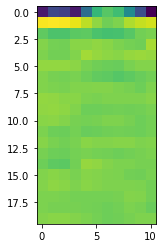

In [ ]:
plt.imshow(X_train[100, :, :, 0])
print(y_train[100])

In [ ]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [ ]:

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

model = Sequential()
model.add(Flatten(input_shape=(config.buckets, config.max_len)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [ ]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

wandb: WARNING The data_type argument of wandb.keras.WandbCallback is deprecated and will be removed in a future release. Please use input_type instead.
wandb: WARNING Setting input_type = data_type.


Epoch 1/50
98/98 [==============================] - 3s 25ms/step - loss: 29.4447 - accuracy: 0.4473 - val_loss: 9.6036 - val_accuracy: 0.6031 - _timestamp: 1651491969.0000 - _runtime: 21.0000
Epoch 2/50
98/98 [==============================] - 1s 12ms/step - loss: 6.9465 - accuracy: 0.6414 - val_loss: 5.1536 - val_accuracy: 0.6830 - _timestamp: 1651491970.0000 - _runtime: 22.0000
Epoch 3/50
98/98 [==============================] - 1s 12ms/step - loss: 4.3316 - accuracy: 0.7208 - val_loss: 3.7451 - val_accuracy: 0.7298 - _timestamp: 1651491972.0000 - _runtime: 24.0000
Epoch 4/50
98/98 [==============================] - 1s 12ms/step - loss: 3.4688 - accuracy: 0.7510 - val_loss: 3.4186 - val_accuracy: 0.7360 - _timestamp: 1651491973.0000 - _runtime: 25.0000
Epoch 5/50
98/98 [==============================] - 1s 14ms/step - loss: 2.9743 - accuracy: 0.7645 - val_loss: 3.0321 - val_accuracy: 0.7514 - _timestamp: 1651491974.0000 - _runtime: 26.0000
Epoch 6/50
98/98 [==========================

In [ ]:

# build model
model = Sequential()
#model.add(LSTM(16, input_shape=(config.buckets, config.max_len, channels), activation="sigmoid"))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [ ]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

![audio.png](attachment:c2924c7d-2f3d-40f2-8e2d-3c7e8b6d0046.png)
